# Glioma analysis

In [6]:
from utils import load_data, cross_validate_regression

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [7]:
X, y = load_data()

models = [
    ('Ridge', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

results_list = []
for model_name, model in models:
    results = cross_validate_regression(X, y, model=model)
    results_list.append(results)
    print(f'{model_name} R2: {results["mean_score"]:.2f}')

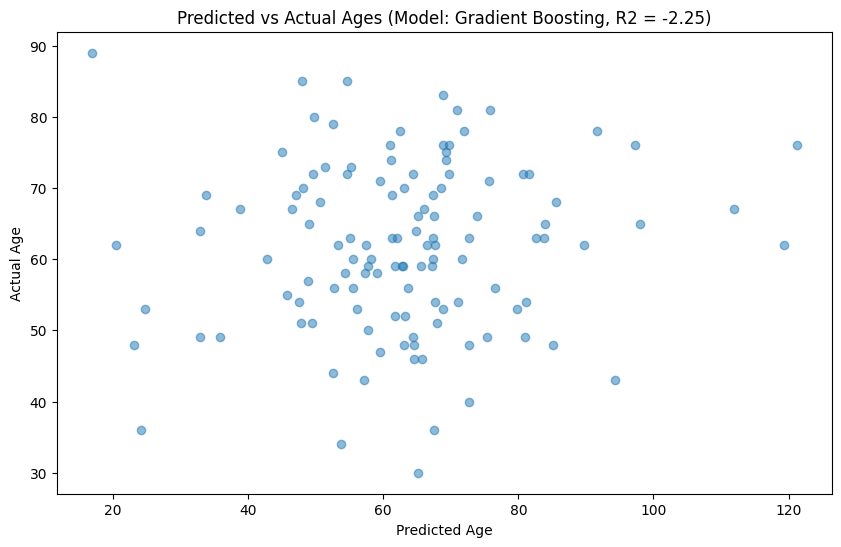

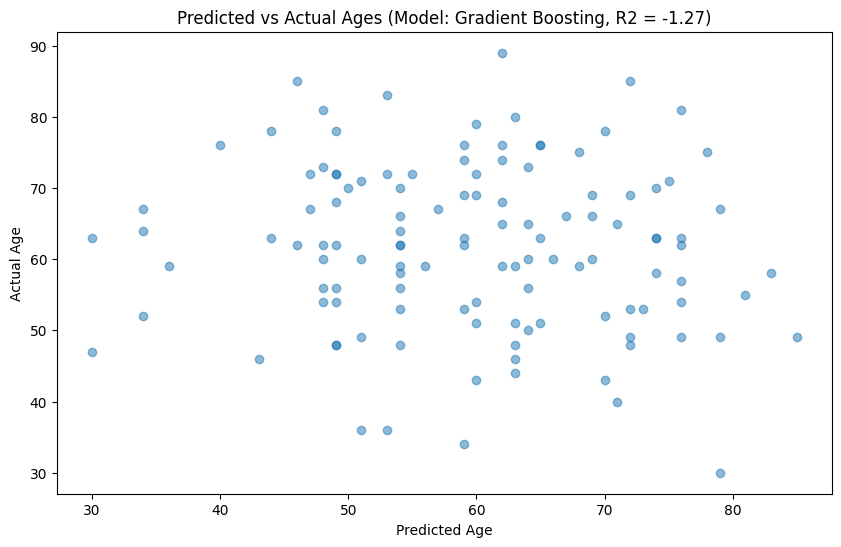

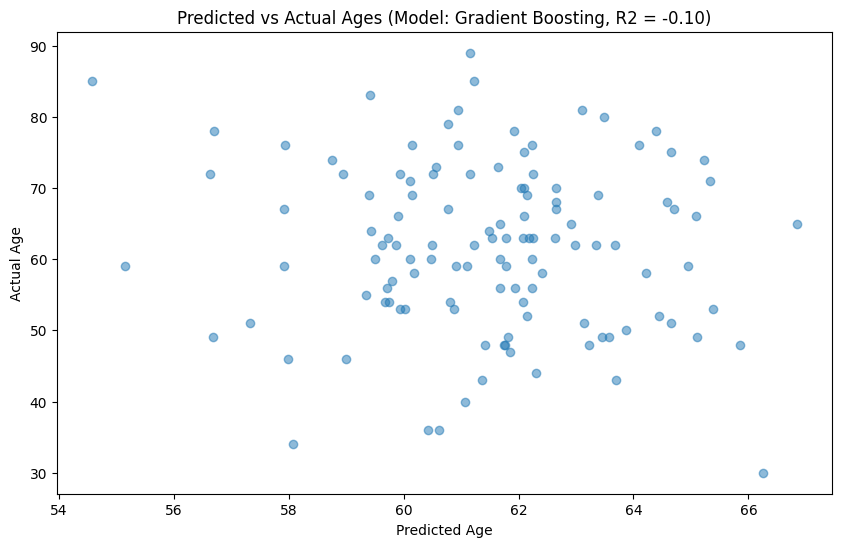

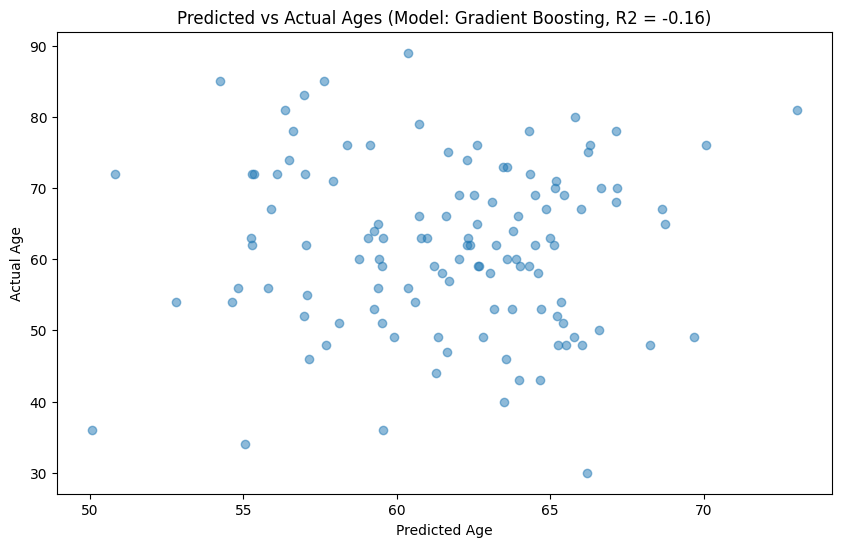

In [8]:
import matplotlib.pyplot as plt

for results in results_list:
    plt.figure(figsize=(10, 6))
    plt.scatter(results['predictions'], y, alpha=0.5)
    plt.xlabel('Predicted Age')
    plt.ylabel('Actual Age')
    plt.title(f'Predicted vs Actual Ages (Model: {model_name}, R2 = {results["mean_score"]:.2f})')